# DATA PREPROCESSING

## Analisis Data

### Import Library

In [30]:
#Import libary-libary yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing

### Menampilkan dan mencari informasi data

In [19]:
#Menload data
df =pd.read_csv("StudentsPerformance.csv", usecols=["gender","parental level of education", "reading score"])
df

,gender,parental level of education,reading score
0,female,bachelor's degree,72
1,female,some college,90
2,female,master's degree,95
3,male,associate's degree,57
4,male,some college,78
...,...,...,...
995,female,master's degree,99
996,male,high school,55
997,female,high school,71
998,female,some college,78


In [22]:
#Melihat baris dan kolom
df.shape

(1000, 3)

In [31]:
#Menampilkan data teratas
df.head()

,gender,parental level of education,reading score
0,female,bachelor's degree,72
1,female,some college,90
2,female,master's degree,95
3,male,associate's degree,57
4,male,some college,78


In [32]:
#Menampilkan data terakhir
df.tail()

,gender,parental level of education,reading score
995,female,master's degree,99
996,male,high school,55
997,female,high school,71
998,female,some college,78
999,female,some college,86


In [24]:
#Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   reading score                1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


Keterangan: data tersebut memiliki 1000 entri dari 0 sampai 999 memiliki 3 kolom yaitu kolom gender yang memiliki 1000 non-null (sebuah angka) dengan tipe data object, dan kolom  parental level of education yang memiliki 1000 non-null (sebuah angka) dengan tipe data object, serta kolom reading score yang memiliki 1000 non-null (sebuah angka) dengan tipe data int. Data ini sudah lengkap tidak memiliki problem missing value.

In [36]:
#Menampilkan deskripsi pada data
df.describe()

,reading score
count,1000.000000
mean,69.169000
std,14.600192
min,17.000000
25%,59.000000
50%,70.000000
75%,79.000000
max,100.000000


In [37]:
#Mengecek data missing value
df.isnull().sum()

gender                         0
parental level of education    0
reading score                  0
dtype: int64

### Data Cleaning

In [41]:
#Import library
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
np.random.seed(0)

In [49]:
#Melihat character encoding dalam data 
with open("StudentsPerformance.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000))

print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [55]:
#Melihat nilai unik pada kolom gender
data = suicide_attacks['gender'].unique()
data.sort()
data

array(['female', 'male'], dtype=object)

In [58]:
#Melihat nilai unik pada parental level of education
data = suicide_attacks['parental level of education'].unique()
data.sort()
data

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype=object)

In [59]:
#Melihat nilai unik pada reading score
data = suicide_attacks['reading score'].unique()
data.sort()
data

array([ 17,  23,  24,  26,  28,  29,  31,  32,  34,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  99, 100], dtype=int64)

In [65]:
#Mengecek item tertentu pada dataframe
any(df['parental level of education'] == 'female')

False

### Menampilkan informasi setiap kolom data dalam bentuk grafik

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

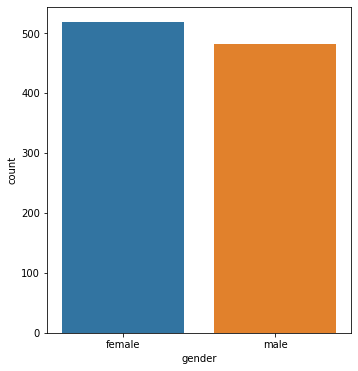

In [66]:
f = plt.figure(figsize=(12,6))

f.add_subplot(1,2,1)
sns.countplot(df['gender'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parental level of education', ylabel='count'>

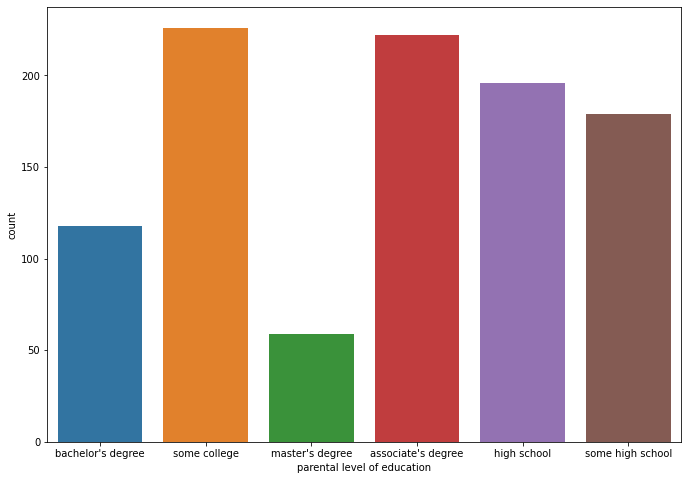

In [67]:
f = plt.figure(figsize=(25,8))

f.add_subplot(1,2,1)
sns.countplot(df['parental level of education'])

<AxesSubplot:ylabel='Density'>

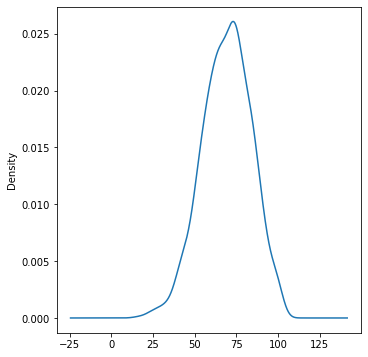

In [77]:
f = plt.figure(figsize=(12,6))

f.add_subplot(1,2,1)
df['reading score'].plot(kind='kde')

### Mengencoding data kategori menjadi numerik

In [80]:
#Mengganti tipe data String menjadi numerik pada kolom gender
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df

,gender,parental level of education,reading score
0,0,bachelor's degree,72
1,0,some college,90
2,0,master's degree,95
3,1,associate's degree,57
4,1,some college,78
...,...,...,...
995,0,master's degree,99
996,1,high school,55
997,0,high school,71
998,0,some college,78


In [81]:
#Mengganti tipe data String menjadi numerik pada kolom parental level of education
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])
df

,gender,parental level of education,reading score
0,0,1,72
1,0,4,90
2,0,3,95
3,1,0,57
4,1,4,78
...,...,...,...
995,0,3,99
996,1,2,55
997,0,2,71
998,0,4,78


### Scaling

tujuan scaling yaitu untuk menghasilkan suatu data numerik yang berada pada rentang tertentu

In [82]:
df

,gender,parental level of education,reading score
0,0,1,72
1,0,4,90
2,0,3,95
3,1,0,57
4,1,4,78
...,...,...,...
995,0,3,99
996,1,2,55
997,0,2,71
998,0,4,78


In [83]:
scaled_data = preprocessor.fit_transform(df)
scaled_data

array([[0.        , 0.2       , 0.6626506 ],
       [0.        , 0.8       , 0.87951807],
       [0.        , 0.6       , 0.93975904],
       ...,
       [0.        , 0.4       , 0.65060241],
       [0.        , 0.8       , 0.73493976],
       [0.        , 0.8       , 0.8313253 ]])

### Binarisation

tujuan dari binarisation yaitu untuk menghasilkan suatu data yang terdiri daru dua numerik saja yaitu 0 dan 1

In [84]:
df

,gender,parental level of education,reading score
0,0,1,72
1,0,4,90
2,0,3,95
3,1,0,57
4,1,4,78
...,...,...,...
995,0,3,99
996,1,2,55
997,0,2,71
998,0,4,78


In [85]:
preprocessor = preprocessing.Binarizer(threshold=0.5)
binarised_data = preprocessor.transform(df)
binarised_data

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


array([[0, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       ...,
       [0, 1, 1],
       [0, 1, 1],
       [0, 1, 1]], dtype=int64)

### Normalisation Dengan Metode Least Absolute Deviations 

Teknik ini bertujuan untuk menormalisasikan terhadap data numerik data yang telah dimiliki

In [86]:
df

,gender,parental level of education,reading score
0,0,1,72
1,0,4,90
2,0,3,95
3,1,0,57
4,1,4,78
...,...,...,...
995,0,3,99
996,1,2,55
997,0,2,71
998,0,4,78


In [87]:
l1_normalised_data = preprocessing.normalize(df, norm='l1')
l1_normalised_data

array([[0.        , 0.01369863, 0.98630137],
       [0.        , 0.04255319, 0.95744681],
       [0.        , 0.03061224, 0.96938776],
       ...,
       [0.        , 0.02739726, 0.97260274],
       [0.        , 0.04878049, 0.95121951],
       [0.        , 0.04444444, 0.95555556]])

### Menampilkan nilai korelasi dari data

In [171]:
#Menampilkan kolerasi dari semua kolom data
kolerasi=df.corr()
kolerasi

,gender,parental level of education,reading score
gender,1.000000,0.001913,-0.244313
parental level of education,0.001913,1.000000,-0.072444
reading score,-0.244313,-0.072444,1.000000


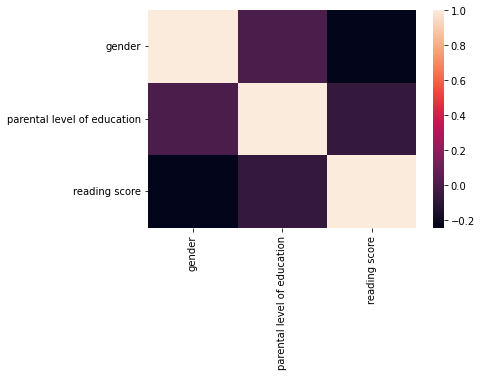

In [172]:
#Menampilkan kolerasi data
import seaborn as sns
sns.heatmap(kolerasi);

# DATA TRAINING DAN TESTING

### Menampilkan informasi keterkaitan independen dan dependen variabel

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline

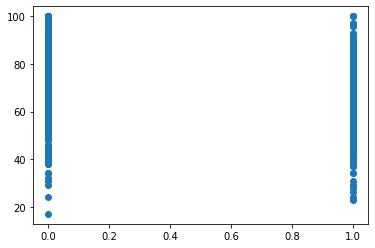

In [174]:
plt.scatter(df['gender'], df['reading score'])

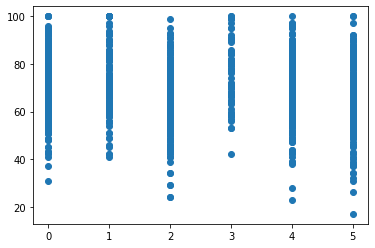

In [175]:
plt.scatter(df['parental level of education'], df['reading score'])

### Classification data menjadi train dan test

In [176]:
#Import Library yang digunakan
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [192]:
#Mendifinisikan nilai X dan y
X = df.drop(columns='gender')
y = df['reading score']

In [201]:
X

,parental level of education,reading score
0,1,72
1,4,90
2,3,95
3,0,57
4,4,78
...,...,...
995,3,99
996,2,55
997,2,71
998,4,78


In [202]:
y

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: reading score, Length: 1000, dtype: int64

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [194]:
#Mengecek jumlah baris nilai X dan y
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


In [195]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [196]:
lin_reg.predict(X_test)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- reading score
Feature names seen at fit time, yet now missing:
- gender

  warnings.warn(message, FutureWarning)


array([  9.19200108,  15.75328185,  22.9068215 ,  -4.81453291,
       -17.79123767, -20.29729821,  11.62513322,  40.08460328,
       -25.0906341 ,  32.63935007,   6.54008376,  18.186414  ,
         1.89260465,  10.07597352,   0.05173137,  26.96204173,
        21.2847334 , -20.96248547,   9.85718834,   4.32573679,
        -7.24766505,  27.10789852,  13.32014971,  18.92452965,
        30.27914632,  22.24163424,  31.16311876,  24.52890959,
         1.81967626, -27.52376625, -10.34598446, -22.65750196,
        -0.4675991 ,   9.93011673,  13.98533697,  10.88701757,
       -28.2618819 ,  13.17429292,  12.50910566,   1.81967626,
        -6.43662101,  15.60742507,   0.19758816,  11.69806162,
       -21.84645791,  27.10789852, -35.70713512,  -4.81453291,
       -13.66308904,  16.49139751,  44.95086757,  24.67476638,
        -2.45432916,  14.79638102,  33.52332251,   8.38095703,
        31.97416281,  16.49139751, -22.73043035,  22.24163424,
        12.43617727,  -3.85763208,   0.86277542,  12.50

In [197]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-3.47244391e-16  1.00000000e+00]
4.263256414560601e-14


In [198]:
coef_dict = {
    'features':X.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,parental level of education,-3.472444e-16
1,reading score,1.000000e+00


In [199]:
y_pred = lin_reg.predict(X_test)
lin_reg.score(X_test, y_test)

1.0

# Kecenderungan nilai dalam kolom tertentu

### Nilai Reading Score Female

In [154]:
f = lin_reg.predict([[0, 1]])
f

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([74.14845328])

### Nilai Reading Score Male

In [157]:
m = lin_reg.predict([[1, 1]])
m

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.77612846])

# DONE